# **Time Series with Statsmodels**

**Example 1: Hodrick-Prescott filter https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter**

In [0]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
from google.colab import drive
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
%matplotlib inline

In [18]:
#Mounting drive to access Google Drive
drive.mount('/content/drive')

#Converting to DataFrame and sorting values
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/macrodata.csv', parse_dates=True,index_col=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### Dataset Description (from Pieran Data Inc.)

<pre><strong>US Macroeconomic Data for 1959Q1 - 2009Q3</strong>
Number of Observations - 203
Number of Variables - 14
Variable name definitions:
    year      - 1959q1 - 2009q3
    quarter   - 1-4
    realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                seasonally adjusted annual rate)
    realcons  - Real personal consumption expenditures (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realinv   - Real gross private domestic investment (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realgovt  - Real federal consumption expenditures & gross investment
                (Bil. of chained 2005 US$, seasonally adjusted annual rate)
    realdpi   - Real private disposable income (Bil. of chained 2005
                US$, seasonally adjusted annual rate)
    cpi       - End of the quarter consumer price index for all urban
                consumers: all items (1982-84 = 100, seasonally adjusted).
    m1        - End of the quarter M1 nominal money stock (Seasonally
                adjusted)
    tbilrate  - Quarterly monthly average of the monthly 3-month
                treasury bill: secondary market rate
    unemp     - Seasonally adjusted unemployment rate (%)
    pop       - End of the quarter total population: all ages incl. armed
                forces over seas
    infl      - Inflation rate (ln(cpi_{t}/cpi_{t-1}) * 400)
    realint   - Real interest rate (tbilrate - infl)</pre>
    


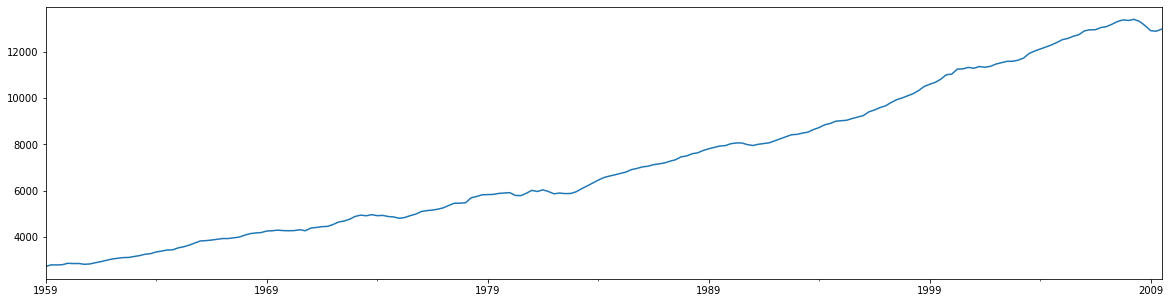

In [20]:
ax=data['realgdp'].plot(figsize=(20,5))
#completar después con más cosas esta gráfica

In [0]:
gdp_cycle,gdp_trend= hpfilter(data['realgdp'],lamb=1600)

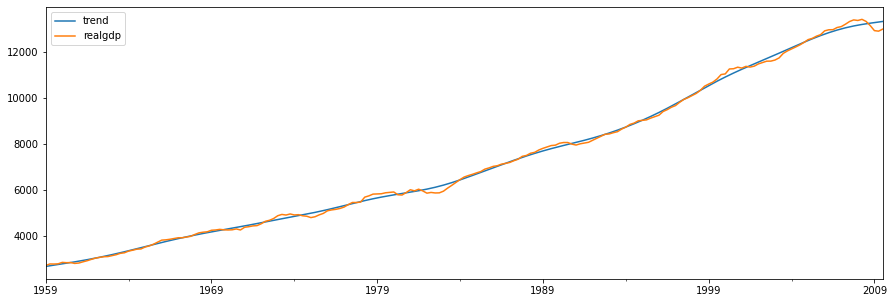

In [25]:
data['trend']=gdp_trend
data[['trend', 'realgdp']].plot(figsize=(15,5))

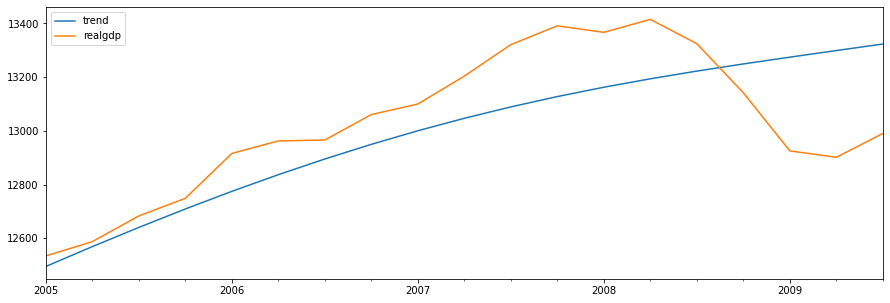

In [26]:
#In this plot we can see that the trend changes due to the economic crisis
data[['trend','realgdp']]['2005-01-01':].plot(figsize=(15,5))

**Example 2: ETS Decomposition**

In [29]:
airdata=pd.read_csv('/content/drive/My Drive/Colab Notebooks/airline_passengers.csv', parse_dates=True,index_col='Month')
airdata.head(5)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [30]:
#Looking for NaN values
airdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


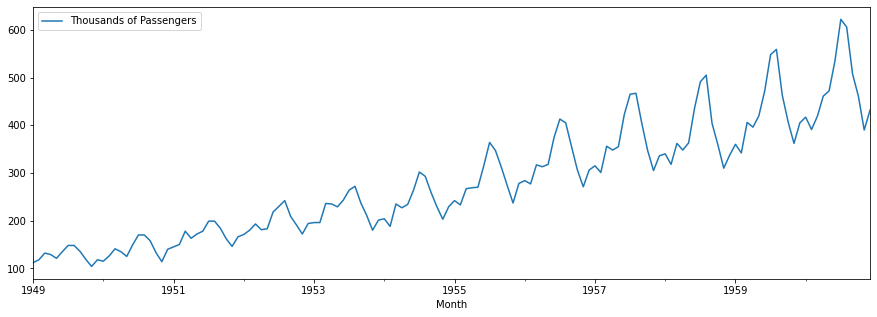

In [33]:
#ETS cannot be done with NaN
airdata=airdata.dropna()
#Viewing Data
airdata.plot(figsize=(15,5))

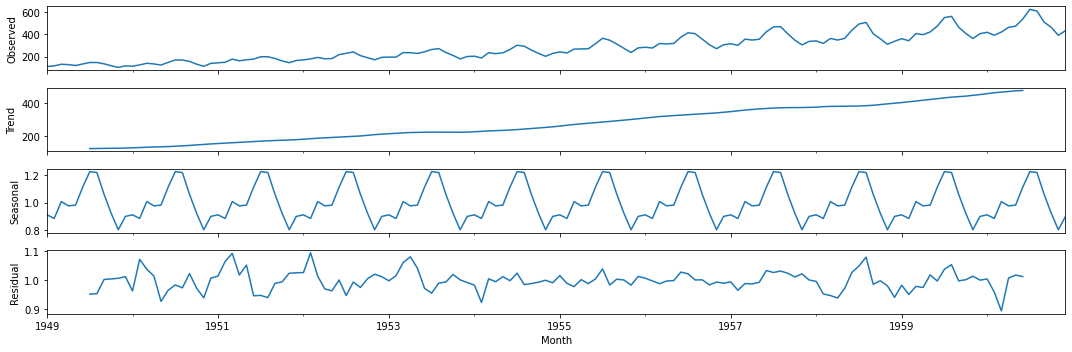

In [41]:
from pylab import rcParams
rcParams['figure.figsize']=15,5
decomposition=seasonal_decompose(airdata['Thousands of Passengers'],model='multiplicative')
decomposition.plot();
#The time series is decomposed into three variables: trend, seasonal and residual

**Example 3: EWMA (Expnentially weighted moving average)**


https://en.wikipedia.org/wiki/Moving_average#Simple_moving_average
**

In [45]:
airdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


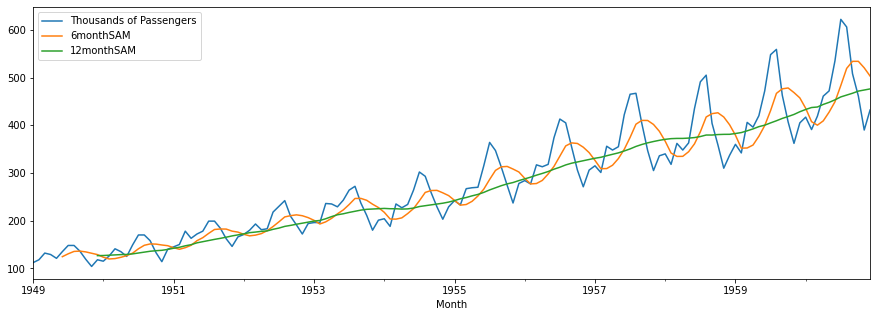

In [49]:
#We create a new column with a SMA of 6 months
airdata['6monthSAM']=airdata['Thousands of Passengers'].rolling(window=6).mean()
#We create a new column with a SMA of 12 months
airdata['12monthSAM']=airdata['Thousands of Passengers'].rolling(window=12).mean()
#Plot the result
airdata.plot();


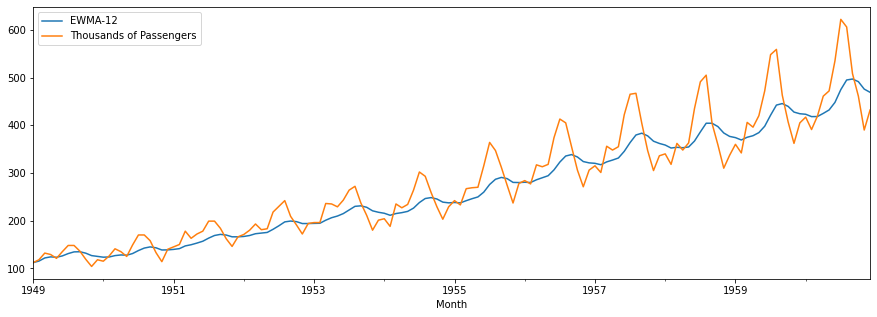

In [51]:
airdata['EWMA-12']=airdata['Thousands of Passengers'].ewm(span=12).mean()
airdata[['EWMA-12','Thousands of Passengers']].plot()

**Example 4: Holt-Winters Method**

In [80]:
airdata=pd.read_csv('/content/drive/My Drive/Colab Notebooks/airline_passengers.csv', parse_dates=True,index_col='Month')
airdata.dropna(inplace=True)
airdata.head(5)
airdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [56]:
airdata.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [81]:
#Since freq=None, we need to specify in order to use Statsmodels
airdata.index.freq='MS'
airdata.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [0]:
#Choosing variables
span=12
alpha=2/(span+1)

In [83]:
#EWMA with Pandas
airdata['EWMA12']=airdata['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
airdata.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [0]:
#Example of EWM with SimpleExpSmoothing through Statsmodels
model=SimpleExpSmoothing(airdata['Thousands of Passengers'])
fitted_model=model.fit(smoothing_level=alpha,optimized=False)

In [85]:
fitted_model.fittedvalues.shift(-1)

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
                 ...    
1960-08-01    494.898619
1960-09-01    496.914216
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01           NaN
Freq: MS, Length: 144, dtype: float64

In [68]:
airdata['DES_add_12']=ExponentialSmoothing(airdata['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)
airdata.head()

,Thousands of Passengers,EWMA12,DES_add_12
Month,,,
1949-01-01,112,112.000000,114.336233
1949-02-01,118,112.923077,120.336233
1949-03-01,132,115.857988,134.336233
1949-04-01,129,117.879836,131.336233
1949-05-01,121,118.359861,123.336233


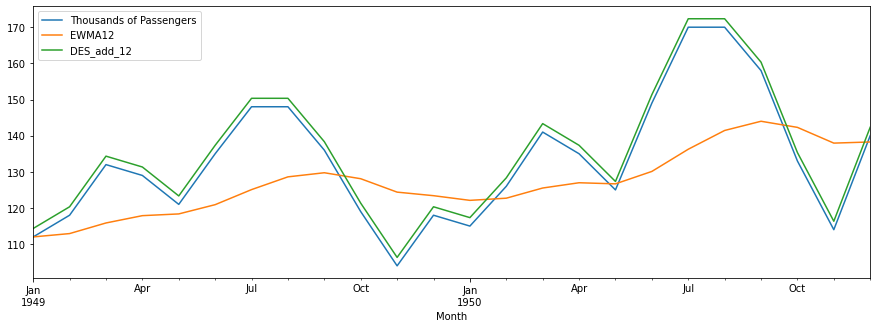

In [71]:
airdata.iloc[:24].plot(figsize=(15,5));

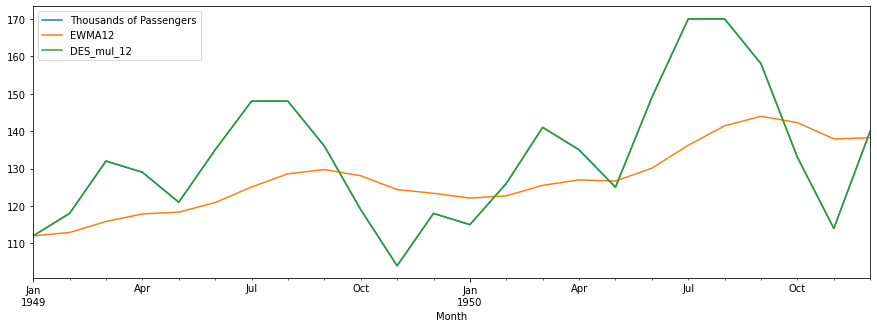

In [86]:
#Comparing the additive and multiplicative models
airdata['DES_mul_12']=ExponentialSmoothing(airdata['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)
airdata.iloc[:24].plot(figsize=(15,5));